In [1]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from envs import Soccer
from learners import FoeQ

In [2]:
TIME_LIMIT = 1000000

In [3]:
env = Soccer(debug=False)

In [4]:
learner = FoeQ(env)

In [5]:
q_values = []
q_values2 = []

for t in range(TIME_LIMIT):
    if t % 100 == 0:
        sys.stdout.write('\r'+str(t))
        q_values.append(learner.Qs[0][71, 1, 4])
        q_values2.append(learner.Qs[0][71, 1, 0])

    learner.train()

999900

In [20]:
q_values = np.array(q_values)
errs = np.abs(q_values[1:] - q_values[:-1])

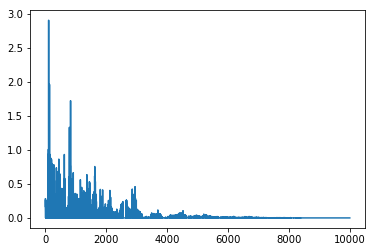

In [21]:
plt.plot(errs)
plt.show()

In [8]:
errs

array([ 0.16891407,  0.2836053 ,  0.23432611, ...,  0.        ,
        0.        ,  0.        ])

In [9]:
q_values2 = np.array(q_values2)
errs = np.abs(q_values2[1:] - q_values2[:-1])

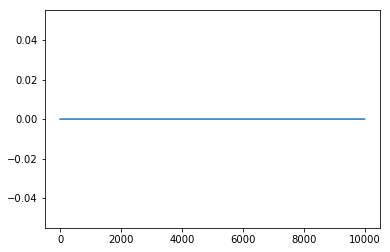

In [10]:
plt.plot(errs)
plt.show()

In [11]:
errs

array([ 0.,  0.,  0., ...,  0.,  0.,  0.])

In [12]:
for row in learner.Qs[0][71].tolist():
    print(',\t'.join([str(round(col,2)) for col in row]))
    print

print('\n')

for row in learner.Qs[1][71].T.tolist():
    print(',\t'.join([str(round(col,2)) for col in row]))
    print

0.26,	-39.27,	0.16,	8.62,	-22.51
0.88,	-0.02,	5.66,	-1.01,	-42.92
0.44,	-7.04,	-0.54,	-0.18,	-39.35
-2.82,	-20.19,	-2.94,	-1.49,	-16.98
-1.0,	-41.29,	-0.27,	5.43,	-21.68


-1.24,	-0.81,	-5.04,	0.59,	0.06
38.15,	-0.38,	2.58,	19.22,	40.19
-2.93,	1.66,	-1.08,	-1.04,	-4.18
-12.58,	3.48,	5.04,	-0.91,	-1.26
21.33,	41.93,	38.22,	16.2,	20.53


In [15]:
arr = learner.Qs[0][71]
p, v = learner._minmax_row(arr)
p

[0.0, 0.0696239653783874, 0.0, 0.9303760346216118, 8.110040998215811e-16]

In [16]:
arr = learner.Qs[1][71].T
p, v = learner._minmax_row(arr)
p

[4.768431795404651e-16,
 0.5676162445986593,
 0.0,
 2.5714160323303966e-16,
 0.43238375540134005]

In [17]:
arr

array([[ -1.24124786,  -0.81019758,  -5.04390382,   0.58855302,
          0.06301602],
       [ 38.14763897,  -0.37846008,   2.58361263,  19.22464031,
         40.19350754],
       [ -2.93053795,   1.65878351,  -1.08457678,  -1.04325439,
         -4.18020995],
       [-12.57690871,   3.48333087,   5.0358561 ,  -0.91301167,
         -1.26058629],
       [ 21.32738088,  41.92943899,  38.22200292,  16.19526632,
         20.53068518]])

In [60]:
df = pd.DataFrame({'t': range(len(errs)),
                   "Err": errs
                  })
df = df[df['Err']>0]
df.head()

,Err,t
0,0.168914,0
1,0.283605,1
2,0.234326,2
3,0.103955,3
4,0.181062,4


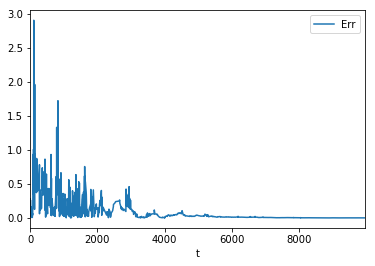

In [61]:
df.plot(x='t', y='Err')
plt.show()

In [62]:
df['t'] = df['t']*100

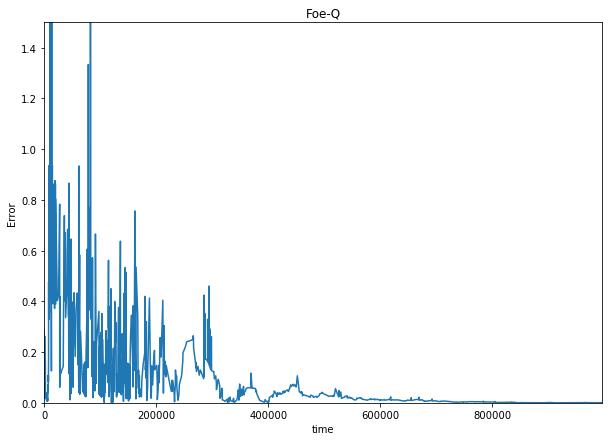

In [63]:
ax = df.plot(x='t', y='Err', figsize=(10, 7), legend=False, ylim=(0., 1.5), title='Foe-Q')
ax.set_xlabel("time")
ax.set_ylabel("Error")
plt.show()